In [4]:
import matplotlib.pyplot as plt
import numpy as np
from utils.model import load_model
from sklearn.decomposition import PCA
import os
os.chdir("/mnt/c/Users/Hillary Hauger/Documents/Studium/SoSe2024/Case Study Non Linear Optimization/Code/latent-communication")
print("Current working directory: ", os.getcwd())

def load_mapping(path,mapping):
    if mapping == 'Linear':
        from optimization.optimizer import LinearFitting
        mapping = LinearFitting.from_file(path)
    elif mapping == 'Affine':
        from optimization.optimizer import AffineFitting
        mapping = AffineFitting.from_file(path)
    elif mapping == 'NeuralNetwork':
        from optimization.optimizer import NeuralNetworkFitting
        mapping = NeuralNetworkFitting.from_file(path)
    else:
        raise ValueError("Invalid experiment name")
    return mapping

Current working directory:  /mnt/c/Users/Hillary Hauger/Documents/Studium/SoSe2024/Case Study Non Linear Optimization/Code/latent-communication


In [41]:
dataset="FMNIST"
num_samples = 10
mapping_name = "Linear"
lamda = 0
sampling_strategy = "equally"
#name_model = "VerySmall-AE"
name_model = "PCKTAE"
seed1,seed2,seed3 = 1,2,3
size_of_the_latent = 50

file1 = f"{dataset}_{name_model}_{size_of_the_latent}_{seed1}.pth"
file2 = f"{dataset}_{name_model}_{size_of_the_latent}_{seed2}.pth"
file3 = f"{dataset}_{name_model}_{size_of_the_latent}_{seed3}.pth"

In [42]:
if name_model == "VerySmall_AE":
    mapping_path1 = f'results/transformations/mapping_files/{name_model}/{file1.strip(".pth")} {file2.strip(".pth")} {mapping_name}_{num_samples}_{lamda}_{sampling_strategy}'
    mapping_path2 = f'results/transformations/mapping_files/{name_model}/{file1.strip(".pth")} {file3.strip(".pth")} {mapping_name}_{num_samples}_{lamda}_{sampling_strategy}'
elif name_model == "VAE":
    mapping_path1 = f'results/transformations/mapping_files/{name_model}/{dataset}/{file1.strip(".pth")}>{file2.strip(".pth")}>{mapping_name}_{num_samples}_{lamda}_{sampling_strategy}'
    mapping_path2 = f'results/transformations/mapping_files/{name_model}/{dataset}/{file1.strip(".pth")}>{file3.strip(".pth")}>{mapping_name}_{num_samples}_{lamda}_{sampling_strategy}'
elif name_model == "PCKTAE":
    mapping_path1 = f'results/transformations/mapping_files/{name_model}/{file1.strip(".pth")}>{file2.strip(".pth")}>{mapping_name}_{num_samples}_{lamda}_{sampling_strategy}'
    mapping_path2 = f'results/transformations/mapping_files/{name_model}/{file1.strip(".pth")}>{file3.strip(".pth")}>{mapping_name}_{num_samples}_{lamda}_{sampling_strategy}'

mapping1 = load_mapping(mapping_path1,mapping_name)
mapping2 = load_mapping(mapping_path2,mapping_name)

In [54]:
if mapping_name == "Linear":
    A1 = mapping1.A.value
    A2 = mapping2.A.value
elif mapping_name == "Affine":
    A1 = mapping1.A_aff.value
    b1 = mapping1.b_aff.value
    A2 = mapping2.A_aff.value
    b2 = mapping2.b_aff.value
#Calculate the eigenvalues and eigenvectors
eigenvalues1, eigenvectors1 = np.linalg.eig(A1.T@A1)
eigenvalues2, eigenvectors2 = np.linalg.eig(A2.T@A2)
#Convert eigenvalues to real numbers
eigenvalues1 = np.real(eigenvalues1)
eigenvalues2 = np.real(eigenvalues2)
#Convert eigenvectors to real numbers
eigenvectors1 = np.real(eigenvectors1)
eigenvectors2 = np.real(eigenvectors2)

In [55]:
# Sort eigenvalues and eigenvectors
idx1 = eigenvalues1.argsort()[::-1]
eigenvalues1 = eigenvalues1[idx1]
eigenvectors1 = eigenvectors1[:,idx1]
idx2 = eigenvalues2.argsort()[::-1]
eigenvalues2 = eigenvalues2[idx2]
eigenvectors2 = eigenvectors2[:,idx2]

In [56]:
# Print eigenvalues of both mappigns
print("Eigenvalues of the first mapping:")
print(eigenvalues1)
print("Eigenvalues of the second mapping:")
print(eigenvalues2)

Eigenvalues of the first mapping:
[ 1.24646448e+00  1.19231706e+00  9.77705875e-01  9.07998864e-01
  8.55299899e-01  7.90986543e-01  7.39183686e-01  6.92761630e-01
  6.51561077e-01  5.17576059e-01  1.30976014e-16  9.20801857e-17
  9.20801857e-17  8.88057890e-17  8.88057890e-17  8.18037843e-17
  6.71034841e-17  5.43533222e-17  5.43533222e-17  2.85270093e-17
  2.85270093e-17  1.98471952e-17  1.98471952e-17  1.30015262e-17
  3.27190325e-18  3.27190325e-18 -3.03271027e-18 -3.03271027e-18
 -5.53759548e-18 -5.53759548e-18 -1.02336348e-17 -2.42641896e-17
 -3.13177359e-17 -4.09421890e-17 -4.40975714e-17 -4.40975714e-17
 -5.05956572e-17 -5.05956572e-17 -6.83394967e-17 -6.83394967e-17
 -7.03215516e-17 -9.14563849e-17 -9.41415008e-17 -9.41415008e-17
 -1.13552799e-16 -1.29492296e-16 -1.29492296e-16 -1.52123143e-16
 -1.52123143e-16 -1.78099653e-16]
Eigenvalues of the second mapping:
[ 1.44318775e+00  1.27871802e+00  1.03101419e+00  9.38020482e-01
  7.82226691e-01  7.62483222e-01  7.23585171e-01  6.

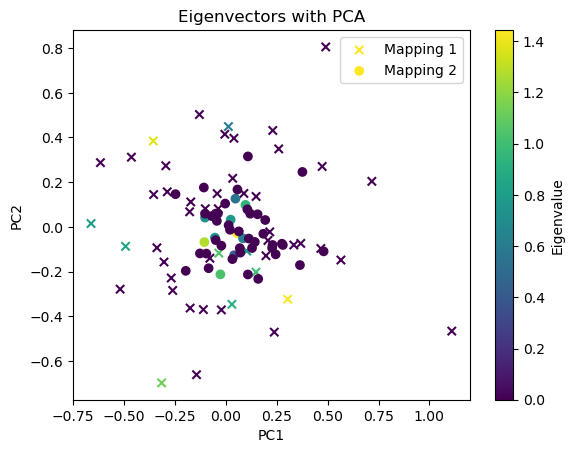

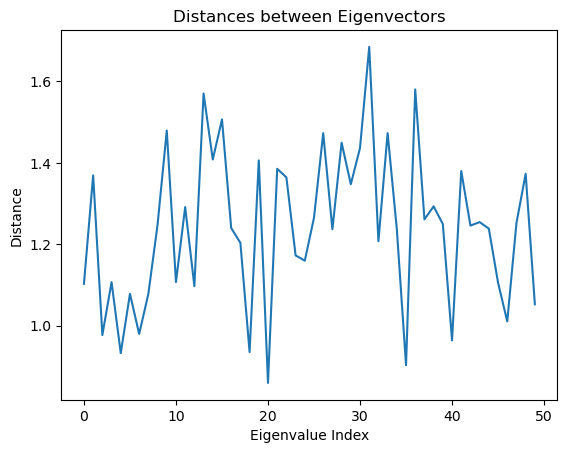

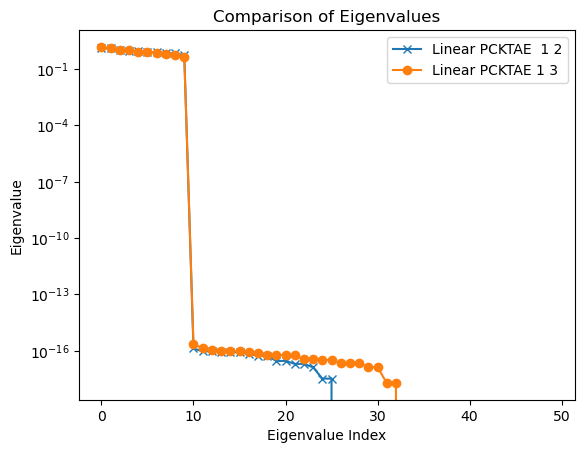

In [58]:
# Perform PCA on eigenvectors1
pca = PCA(n_components=2)
eigenvectors1_pca = pca.fit_transform(eigenvectors1)
eigenvectors2_pca = pca.transform(eigenvectors2)
# Plot eigenvectors with PCA of the first mapping
plt.scatter(eigenvectors1_pca[:, 0], eigenvectors1_pca[:, 1],marker = 'x', c=eigenvalues1, cmap='viridis', label="Mapping 1")
plt.scatter(eigenvectors2_pca[:, 0], eigenvectors2_pca[:, 1],marker='o', c=eigenvalues2, cmap='viridis', label="Mapping 2")
plt.colorbar(label='Eigenvalue')
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Eigenvectors with PCA')
plt.show()

# Plot the distances between the eigenvectors
distances = np.linalg.norm(eigenvectors1 - eigenvectors2, axis=1)
plt.plot(range(len(distances)), distances)
plt.xlabel('Eigenvalue Index')
plt.ylabel('Distance')
plt.title('Distances between Eigenvectors')
plt.show()

# Compare the eigenvalues of the two mappings with a plot
plt.plot(range(len(eigenvalues1)), eigenvalues1, label=f'{mapping_name} {name_model}  {seed1} {seed2}',marker='x')
plt.plot(range(len(eigenvalues2)), eigenvalues2, label=f'{mapping_name} {name_model} {seed1} {seed3}',marker='o')
plt.yscale('log')
plt.xlabel('Eigenvalue Index')
plt.ylabel('Eigenvalue')
plt.title(f'Comparison of Eigenvalues {dataset}')
plt.legend()
plt.show()

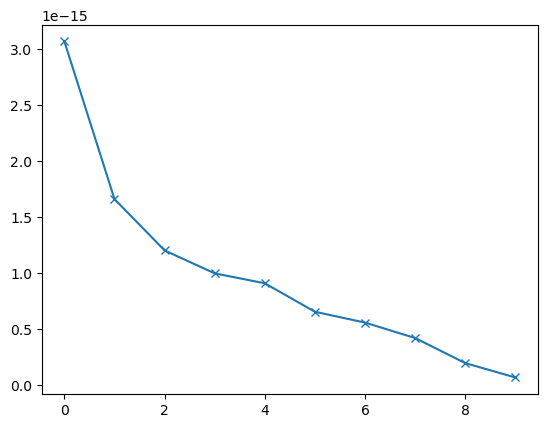

In [122]:
#Calculate the principal angles between the two subspaces
import scipy
principal_angles = scipy.linalg.subspace_angles(A1, A2)
# plot principal angles
plt.plot(range(len(principal_angles)), principal_angles,marker='x')